In [1]:
import matplotlib.pyplot as plt
from numpy import *
from scipy import interpolate
from copy import copy, deepcopy

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
class readfield:
    def __init__(self, filename):
        D_file = open(filename, 'r', encoding = 'utf8')
        n = -1
        m = 0
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]):
                Dtemp[n].append([])
                Dtemp[n][m].extend([float(position) for position in split_line])
                m = m + 1
            else:
                Dtemp.append([])
                n = n + 1
                m = 0
        D_file.close()
        Dtemp = Dtemp[1]
        
        self.X = reshape([Dtemp[i][0] for i in range(len(Dtemp))],(81,81))*1e-3
        self.Y = reshape([Dtemp[i][1] for i in range(len(Dtemp))],(81,81))*1e-3
        self.Z = Dtemp[0][2]*1e-3
        self.N = int(sqrt(len(Dtemp)))
        self.DX = reshape([Dtemp[i][3] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][4] for i in range(len(Dtemp))],(81,81))
        self.DY = reshape([Dtemp[i][5] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][6] for i in range(len(Dtemp))],(81,81))
        self.DZ = reshape([Dtemp[i][7] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][8] for i in range(len(Dtemp))],(81,81))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)
    def __copy__(self):
        return type(self)

In [4]:
class readarray:
    def __init__(self):
        ### X pol
        D_file = open('arrayX.txt', 'r', encoding = 'utf8')
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayX2.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayX3.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        self.DX = reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8))
        
        ### Y pol
        D_file = open('arrayY.txt', 'r', encoding = 'utf8')
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayY2.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayY3.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        self.DY = flip(reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8)),axis = 1).T

        
        self.X, self.Y = meshgrid(linspace(0, 35*1e-3, num=8), linspace(0, 35*1e-3, num=8))
        self.Z = 2*1e-3
        self.N = 8
        self.DZ = zeros((8,8))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

# Loading data

In [5]:
Eanal = readfield('E.txt')
Hanal = readfield('H.txt')
Hanal.DX.shape

(81, 81)

In [6]:
arr = readarray()
arr.DX.shape

(8, 8)

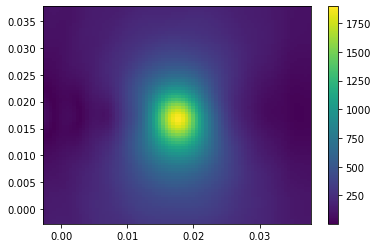

In [7]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DX),shading='auto')
plt.colorbar()
plt.show()

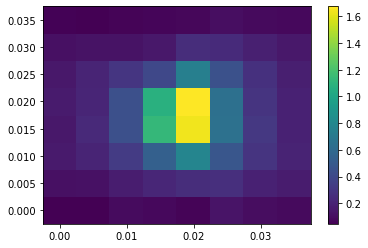

In [8]:
plt.pcolormesh(arr.X,arr.Y,flip(abs(arr.DX),axis = 1),shading='auto')
plt.colorbar()
plt.show()

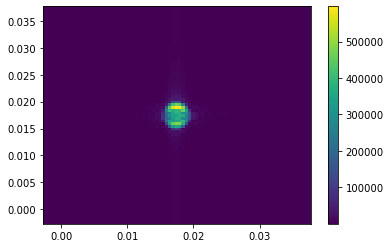

In [9]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DX)))),shading='auto')
plt.colorbar()
plt.show()

In [10]:
T = reshape([i for i in range(64)],(8,8))
T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

### Rotate counter clockwise

In [11]:
flip(T,axis = 1).T

array([[ 7, 15, 23, 31, 39, 47, 55, 63],
       [ 6, 14, 22, 30, 38, 46, 54, 62],
       [ 5, 13, 21, 29, 37, 45, 53, 61],
       [ 4, 12, 20, 28, 36, 44, 52, 60],
       [ 3, 11, 19, 27, 35, 43, 51, 59],
       [ 2, 10, 18, 26, 34, 42, 50, 58],
       [ 1,  9, 17, 25, 33, 41, 49, 57],
       [ 0,  8, 16, 24, 32, 40, 48, 56]])

### Rotate clockwise

In [12]:
flip(T,axis = 0).T

array([[56, 48, 40, 32, 24, 16,  8,  0],
       [57, 49, 41, 33, 25, 17,  9,  1],
       [58, 50, 42, 34, 26, 18, 10,  2],
       [59, 51, 43, 35, 27, 19, 11,  3],
       [60, 52, 44, 36, 28, 20, 12,  4],
       [61, 53, 45, 37, 29, 21, 13,  5],
       [62, 54, 46, 38, 30, 22, 14,  6],
       [63, 55, 47, 39, 31, 23, 15,  7]])

f = interpolate.interp2d(Eanal.X[0], Eanal.X[0]+0.5, Eanal.DY, kind='cubic')

Einterp = f(arr.X[0],arr.X[0])

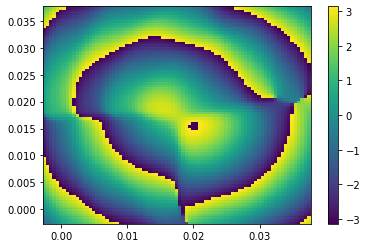

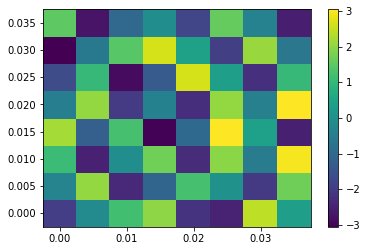

In [13]:
plt.pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DY),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(arr.X,arr.Y,angle(arr.DY),shading='auto')
plt.colorbar()
plt.show()

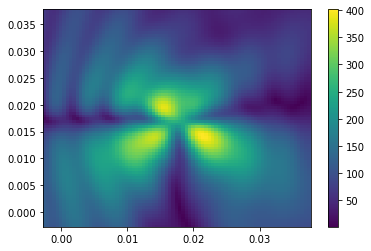

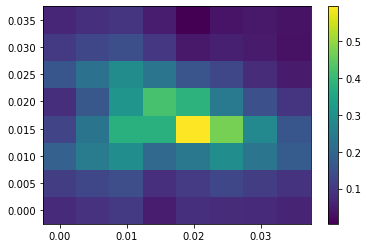

In [14]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DY),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(arr.X,arr.Y,abs(arr.DY),shading='auto')
plt.colorbar()
plt.show()

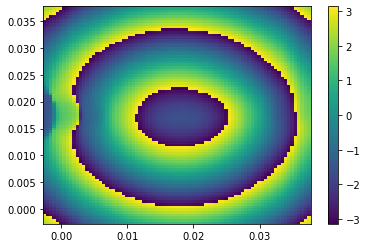

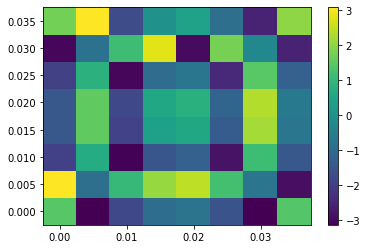

In [15]:
plt.pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DX),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(arr.X,arr.Y,flip(angle(arr.DX),axis = 1),shading='auto')
plt.colorbar()
plt.show()

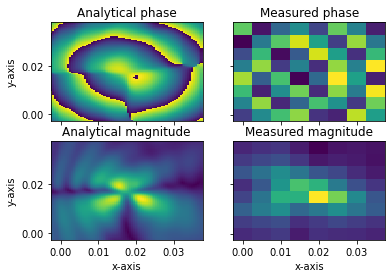

In [16]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DY),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(arr.X,arr.Y,angle(arr.DY),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DY),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(arr.X,arr.Y,abs(arr.DY),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

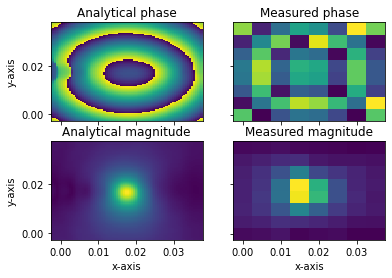

In [17]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DX),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(arr.X,arr.Y,angle(arr.DX),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DX),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(arr.X,arr.Y,abs(arr.DX),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Maxwell's equations check

In [18]:
k0 = 2*pi*3e10/299792458
k0

628.7535065855045

In [19]:
Nspec = Eanal.N
dx = 0.5e-3
dy = 0.5e-3
kx = (-1/2 + (arange(Nspec))/Nspec)*(2*pi/dx)
ky = (-1/2 + (arange(Nspec))/Nspec)*(2*pi/dy)
KX,KY = meshgrid(kx,ky)
KZ = conj(sqrt((k0**2-KX**2-KY**2)*(1+0j)))

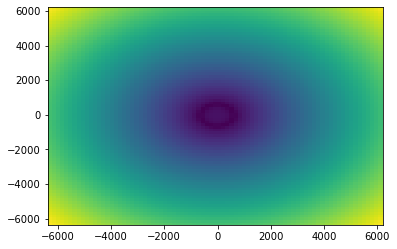

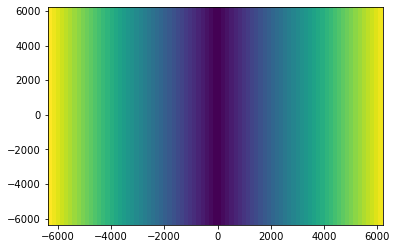

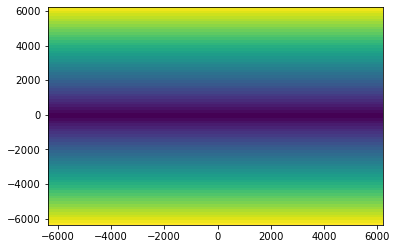

In [20]:
plt.pcolormesh(kx,ky,abs(KZ),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,abs(KX),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,abs(KY),shading='auto')
plt.show()

In [21]:
sEanal = copy(Eanal)
sEanal.X = KX
sEanal.Y = KY
sEanal.Z = KZ
sEanal.DX = fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DX)))
sEanal.DY = fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DY)))
sEanal.DZ = fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DZ)))
sEanal.D = swapaxes(stack([sEanal.DX, sEanal.DY, sEanal.DZ],axis=1),1,2)

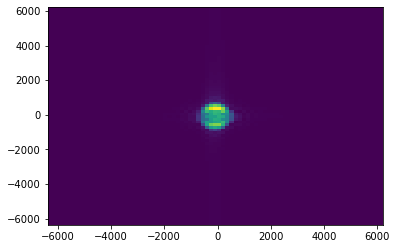

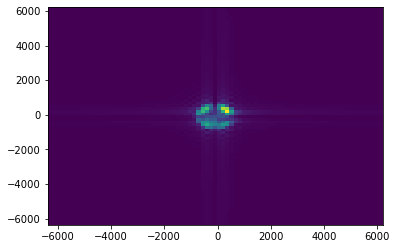

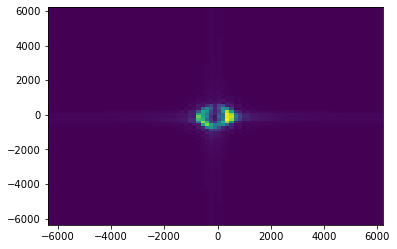

In [22]:
plt.pcolormesh(kx,ky,abs(sEanal.DX),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,abs(sEanal.DY),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,abs(sEanal.DZ),shading='auto')
plt.show()

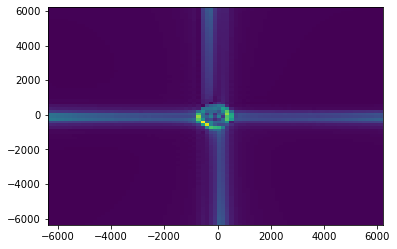

In [23]:
Gausse = sEanal.DX*KX + sEanal.DY*KY + sEanal.DZ*KZ
plt.pcolormesh(kx,ky,abs(Gausse),shading='auto')
plt.show()

In [24]:
abs(Gausse).max()

110351059.04003762

In [25]:
sEZ_rec = -(sEanal.DX*KX + sEanal.DY*KY)/KZ

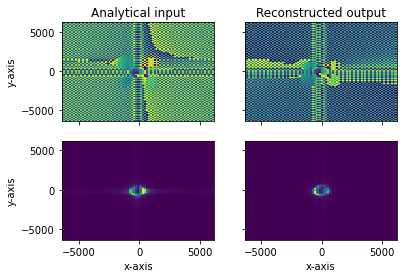

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(sEanal.X,sEanal.Y,angle(sEanal.DZ),shading='auto')
axs[0, 0].set_title('Analytical input')
axs[0, 1].pcolormesh(sEanal.X,sEanal.Y,angle(sEZ_rec),shading='auto')
axs[0, 1].set_title('Reconstructed output')
axs[1, 0].pcolormesh(sEanal.X,sEanal.Y,abs(sEanal.DZ),shading='auto')
#axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(sEanal.X,sEanal.Y,abs(sEZ_rec),shading='auto')
#axs[1, 1].set_title('Rec. magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

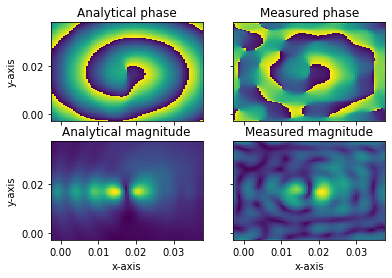

In [27]:
EZ_rec = fft.fftshift(fft.ifft2(fft.ifftshift(sEZ_rec)))

fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DZ),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Eanal.X,Eanal.Y,angle(EZ_rec),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DZ),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Eanal.X,Eanal.Y,abs(EZ_rec),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [28]:
abs(EZ_rec)

array([[313.92892974, 369.66359492, 415.39864385, ..., 303.14739786,
        278.23349525, 272.66262374],
       [324.52702402, 319.82844009, 336.75818329, ..., 347.90354329,
        331.95824774, 334.03679211],
       [324.17136222, 326.81272792, 338.05003572, ..., 340.86006253,
        331.08189401, 329.98139463],
       ...,
       [185.0596474 , 182.30173872, 200.06599387, ..., 281.88218581,
        248.48628062, 209.30024943],
       [231.15843677, 232.38875974, 253.79695143, ..., 307.4781192 ,
        276.38920786, 245.65582644],
       [280.7274701 , 341.89471118, 388.97567785, ..., 292.17825267,
        265.86715367, 236.20354717]])

In [29]:
abs(Eanal.DZ)

array([[ 76.95187772,  72.22255151,  69.66587993, ...,  57.07162998,
         56.23847049,  55.26674207],
       [ 78.17204329,  73.47157537,  71.24595698, ...,  58.80958708,
         57.86292472,  56.79394038],
       [ 79.38687996,  74.79412326,  72.99580579, ...,  60.55289821,
         59.46839408,  58.28285266],
       ...,
       [ 62.80393211,  65.9969913 ,  72.10978655, ..., 145.33536047,
        142.33167822, 139.37993965],
       [ 61.31340375,  64.34318144,  70.21837677, ..., 144.13552396,
        141.10525115, 138.09533763],
       [ 59.83726579,  62.69141285,  68.32523042, ..., 142.77315662,
        139.67640579, 136.57903743]])